<a href="https://colab.research.google.com/github/wlcosta/es235_pdi/blob/master/10_transformacoes/lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aula 10 - Transformações geométricas

Neste notebook iremos usar os métodos do OpenCV para transformações geométricas. Iremos usar os seguintes métodos como base:

1. [warpAffine()](https://docs.opencv.org/3.4.2/da/d54/group__imgproc__transform.html#ga0203d9ee5fcd28d40dbc4a1ea4451983): aplica uma transformação recebendo uma matriz 2x3
2. [warpPerspective()](https://docs.opencv.org/3.4.2/da/d54/group__imgproc__transform.html#gaf73673a7e8e18ec6963e3774e6a94b87): aplica uma transformação recebendo uma matriz 3x3

Vamos importar as bibliotecas necessárias:

In [1]:
%matplotlib inline
import cv2 # OpenCV
import matplotlib.pyplot as plt # Matplotlib
import numpy as np # Numpy
!wget https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/lenna.jpg

--2021-06-16 19:59:57--  https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/lenna.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473831 (463K) [image/jpeg]
Saving to: ‘lenna.jpg’

lenna.jpg           100%[===================>] 462.73K  --.-KB/s    in 0.05s   

2021-06-16 19:59:58 (9.65 MB/s) - ‘lenna.jpg’ saved [473831/473831]



E agora, vamos carregar a imagem da Lenna:

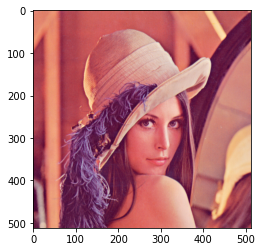

In [2]:
img = plt.imread('lenna.jpg')
plt.imshow(img)

### Escalamento

O escalamento é apenas o redimensionamento da imagem. Usaremos o método [resize()](https://docs.opencv.org/3.4.2/da/d54/group__imgproc__transform.html#ga47a974309e9102f5f08231edc7e7529d) para isso.

Complete o código abaixo aplicando o método cv2.resize() que recebe como argumentos:
1. A imagem de entrada;
2. Use None para o argumento dsize para que o tamanho seja computado automaticamente;
3. Fator horizontal "fx". Use fx=2.
4. Fator vertical "fy". Use fy=2.

Dimensão original:  (512, 512, 3) 
Nova dimensão:  (1024, 1024, 3)


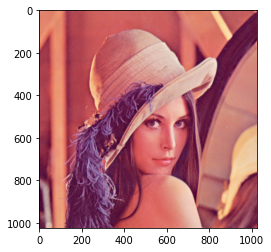

In [6]:
img_escalada = None
plt.imshow(img_escalada)
print("Dimensão original: ", img.shape, "\nNova dimensão: ", img_escalada.shape)

No exemplo acima nós aumentamos em uma escala de 2. Podemos também definir valores diretos para a resolução.

Use novamente o método cv2.resize(), mas, desta vez, com os seguintes argumentos:
1. A imagem de entrada;
2. Uma tupla no formato (x, y) que será o novo shape da imagem.

Dimensão original:  (512, 512, 3) 
Nova dimensão:  (40, 512, 3)


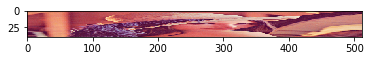

In [ ]:
img_escalada = None
plt.imshow(img_escalada)
print("Dimensão original: ", img.shape, "\nNova dimensão: ", img_escalada.shape)

### Translação

Translação é mudar a localização do objeto. Podemos definir uma matriz de translação e aplicá-la à imagem usando o método [warpAffine()](https://docs.opencv.org/3.4.2/da/d54/group__imgproc__transform.html#ga0203d9ee5fcd28d40dbc4a1ea4451983).

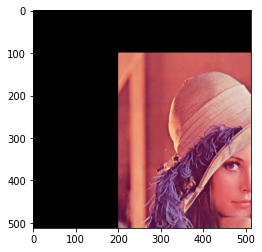

In [10]:
dx = 200 #@param {type:"integer"}
dy = 100 #@param {type:"integer"}
'''
Lembrando a estrutura da matriz:
M = [1 0 t_x
     0 1 t_y]
'''

M = np.float32([[1, 0, dx], [0, 1, dy]])
img_translacao = cv2.warpAffine(img, M, (512, 512))
plt.imshow(img_translacao)

### Rotação

No OpenCV, a rotação pode ser feita usando a matriz de rotação com o método já implementado [getRotationMatrix2D()](https://docs.opencv.org/3.4.2/da/d54/group__imgproc__transform.html#gafbbc470ce83812914a70abfb604f4326). Vamos rotacionar a imagem em 45 graus a partir do centro (por isso vamos dividir por 2):

[[   0.70710678    0.70710678 -105.83156519]
 [  -0.70710678    0.70710678  255.5       ]]


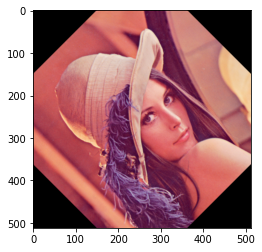

In [18]:
deg = 45 #@param {type:"slider", min:0, max:360, step:45}
M =  cv2.getRotationMatrix2D(((img.shape[1]-1)/2.0,(img.shape[0]-1)/2.0),deg,1)
print(M)
img_rotacionada = cv2.warpAffine(img, M, (512, 512))
plt.imshow(img_rotacionada)

### Affine Transform

Nesta transformada, todas as linhas paralelas na imagem original também serão paralelas na imagem de saída.

In [20]:
!wget https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/grid.png

--2021-06-16 20:23:44--  https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/grid.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6107 (6.0K) [image/png]
Saving to: ‘grid.png’

grid.png            100%[===================>]   5.96K  --.-KB/s    in 0s      

2021-06-16 20:23:44 (80.2 MB/s) - ‘grid.png’ saved [6107/6107]



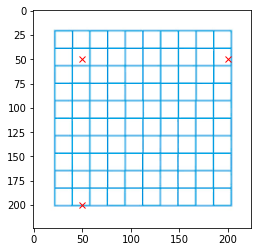

In [21]:
grid = plt.imread('grid.png')
plt.imshow(grid)
plt.plot(50, 50, 'rx', 200, 50, 'rx', 50, 200, 'rx')

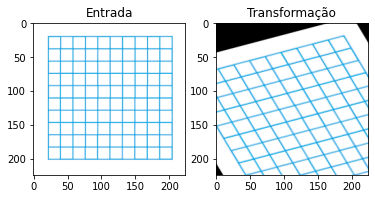

In [23]:
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
M = cv2.getAffineTransform(pts1,pts2)
img_transformada = cv2.warpAffine(grid,M,(grid.shape[1],grid.shape[0]))
plt.subplot(121),plt.imshow(grid),plt.title('Entrada')
plt.subplot(122),plt.imshow(img_transformada),plt.title('Transformação')
plt.show()

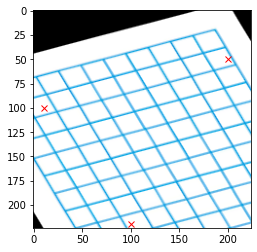

In [24]:
plt.imshow(img_transformada)
plt.plot(10, 100, 'rx', 200, 50, 'rx', 100, 220, 'rx')

### Perspectiva (sem homografia)

Para essa transformação, vamos precisar de uma matriz de transformação. Linhas que eram retas na imagem original vão continuar retas. É necessário 4 pontos em cada imagem para encontrar essa matriz.

In [26]:
!wget https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/sudoku.jpg

--2021-06-16 20:28:49--  https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/sudoku.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46768 (46K) [image/jpeg]
Saving to: ‘sudoku.jpg’

sudoku.jpg          100%[===================>]  45.67K  --.-KB/s    in 0.01s   

2021-06-16 20:28:50 (3.47 MB/s) - ‘sudoku.jpg’ saved [46768/46768]



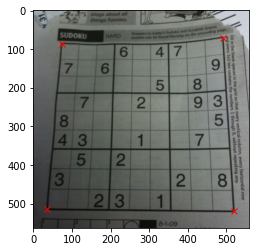

In [27]:
sudoku = plt.imread('sudoku.jpg')
plt.imshow(sudoku)
plt.plot(74, 87, 'rx', 491, 70, 'rx', 519, 520, 'rx', 35, 515, 'rx')

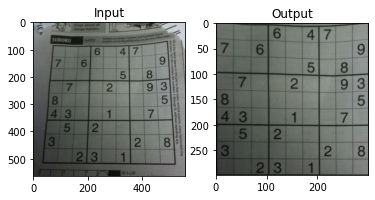

In [28]:
pts1 = np.float32([[74,87],[491,70],[519,520],[35,515]])
pts2 = np.float32([[0,0],[300,0],[300,300],[0,300]])
M = cv2.getPerspectiveTransform(pts1,pts2)
perspectiva = cv2.warpPerspective(sudoku,M,(300,300))
plt.subplot(121),plt.imshow(sudoku),plt.title('Input')
plt.subplot(122),plt.imshow(perspectiva),plt.title('Output')
plt.show()

Quadro

x0 = 723, 160
x1 = 834, 161
x3 = 714, 273
x4 = 836, 276

tv

x0 = 949, 492
x1 = 1014, 510
x2 = 940, 572
x3 = 1007, 599

In [29]:
!wget https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/peppa.jpg
!wget https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/pele.jpg

--2021-06-16 20:30:09--  https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/peppa.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85054 (83K) [image/jpeg]
Saving to: ‘peppa.jpg’

peppa.jpg           100%[===================>]  83.06K  --.-KB/s    in 0.02s   

2021-06-16 20:30:10 (4.99 MB/s) - ‘peppa.jpg’ saved [85054/85054]

--2021-06-16 20:30:10--  https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/pele.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14004 (14K) [image/jpeg]
Saving to: ‘pele.jp

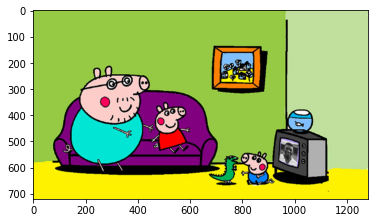

In [34]:
peppa = plt.imread('peppa.jpg')
pele = plt.imread('pele.jpg')
rows, cols = pele.shape[:2]

localizacao = "tv" #@param ["quadro", "tv"]
locs = {
    'quadro': np.float32([[723,160],[834,161],[714,273],[836,276]]),
    'tv': np.float32([[949,492],[1014,510],[940,572],[1007,599]])
}
#quadro = np.float32([[723,160],[834,161],[714,273],[836,276]])
#tv = np.float32([[949,492],[1014,510],[940,572],[1007,599]])
#pts1 = np.float32([[723,160],[834,161],[714,273],[836,276]])

pts2 = np.float32([[0,0],[cols,0],[0,rows],[cols,rows]])
M = cv2.getPerspectiveTransform(pts2,locs[localizacao])
M2 = cv2.getPerspectiveTransform(np.float32([[949,492],[1014,510],[940,572],[1007,599]]), pts2)
cv2.warpPerspective(pele, M, (peppa.shape[1],peppa.shape[0]), peppa, borderMode=cv2.BORDER_TRANSPARENT)

plt.imshow(peppa)